In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
spaceship_titanic_dataset = pd.read_csv('train.csv')
print(f"La taille (Lignes et colonnes) de l'ensemble des données d'entraînement : {spaceship_titanic_dataset.shape}")

La taille (Lignes et colonnes) de l'ensemble des données d'entraînement : (8693, 14)


In [3]:
###Suppression des colonnes non importantes pour nos données d'entraînement
spaceship_titanic_train = spaceship_titanic_dataset.drop(['PassengerId', 'Name'], axis=1)
spaceship_titanic_train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


## Gestion des valeurs manquantes

In [8]:
#moyenne des valeurs manquantes dans chaque variable
spaceship_titanic_dataset.isnull().mean().sort_values(ascending=False)

CryoSleep       0.024963
ShoppingMall    0.023927
VIP             0.023352
HomePlanet      0.023122
Name            0.023007
Cabin           0.022892
VRDeck          0.021627
FoodCourt       0.021051
Spa             0.021051
Destination     0.020936
RoomService     0.020821
Age             0.020591
PassengerId     0.000000
Transported     0.000000
dtype: float64

### Première methode pour gerer les valeurs manquantes
##### Processus : Nous allons sélectionner aléatoirement des valeurs pour chaque variable du dataset afin de remplacer les valeurs manquantes, ainsi nous ne perdrons pas nos données.

In [4]:
def missing_values_random(dataset):
    df = dataset.copy()
    null_values = df.isnull().sum().sort_values(ascending=False)
    for col in null_values.index:
        if null_values[col] != 0:
            new_col = col + '_filled'
            df[new_col] = df[col].copy()

            random_sample = df[col].dropna().sample(df[col].isnull().sum(), random_state=0)
            random_sample.index = df[df[col].isnull()].index

            df.loc[df[col].isnull(), new_col] = random_sample
    return df


In [5]:
resultat_random = missing_values_random(spaceship_titanic_dataset)
resultat_random.isnull().sum().sort_values(ascending=False)


CryoSleep              217
ShoppingMall           208
VIP                    203
HomePlanet             201
Name                   200
Cabin                  199
VRDeck                 188
FoodCourt              183
Spa                    183
Destination            182
RoomService            181
Age                    179
Destination_filled       0
FoodCourt_filled         0
Spa_filled               0
PassengerId              0
RoomService_filled       0
Cabin_filled             0
VRDeck_filled            0
Transported              0
Name_filled              0
HomePlanet_filled        0
VIP_filled               0
ShoppingMall_filled      0
CryoSleep_filled         0
Age_filled               0
dtype: int64

In [7]:
def compare_distributions(dataset):
    # Sélectionner les colonnes numériques et catégorielles
    numeric_columns = dataset.select_dtypes(include=['number']).columns
    categorical_columns = dataset.select_dtypes(include=['object']).columns
    
    # Comparaison des distributions pour les colonnes numériques
    for var in numeric_columns:
        var_filled = var + '_filled'
        if var_filled in dataset.columns:
            plt.figure(figsize=(8, 6))
            dataset[var].plot(kind='kde', label=f"{var} original", color='blue')
            dataset[var_filled].plot(kind='kde', label=f"{var} filled", color='red')
            plt.title(f"Distribution de {var}")
            plt.legend()
            plt.xlabel(var)
            plt.ylabel('Density')
            plt.xlim(dataset[var].min(), dataset[var].max())
            plt.ylim(0, None)
            plt.show()
    
    # Comparaison des distributions pour les colonnes catégorielles
    for var in categorical_columns:
        var_filled = var + '_filled'
        if var_filled in dataset.columns:
            plt.figure(figsize=(8, 6))
            dataset[var].value_counts(normalize=True).plot(kind='bar', alpha=0.5, label=f"{var} original", color='blue')
            dataset[var_filled].value_counts(normalize=True).plot(kind='bar', alpha=0.5, label=f"{var} filled", color='red')
            plt.title(f"Distribution de {var}")
            plt.legend()
            plt.xlabel(var)
            plt.ylabel('Fréquence')
            plt.show()




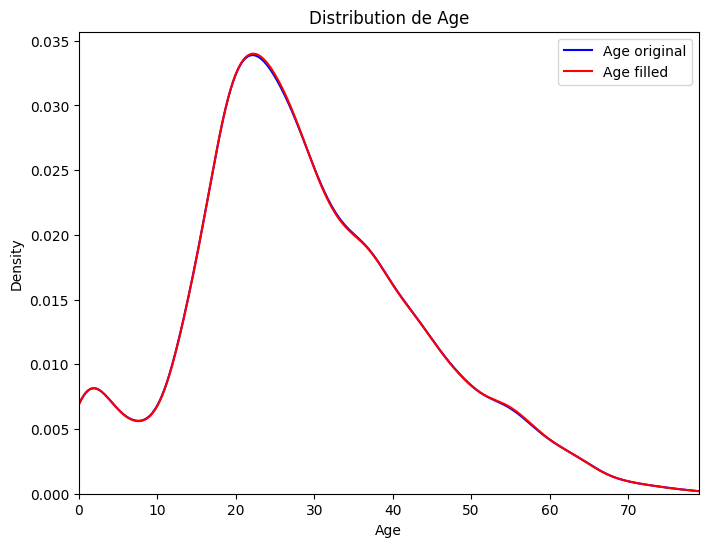

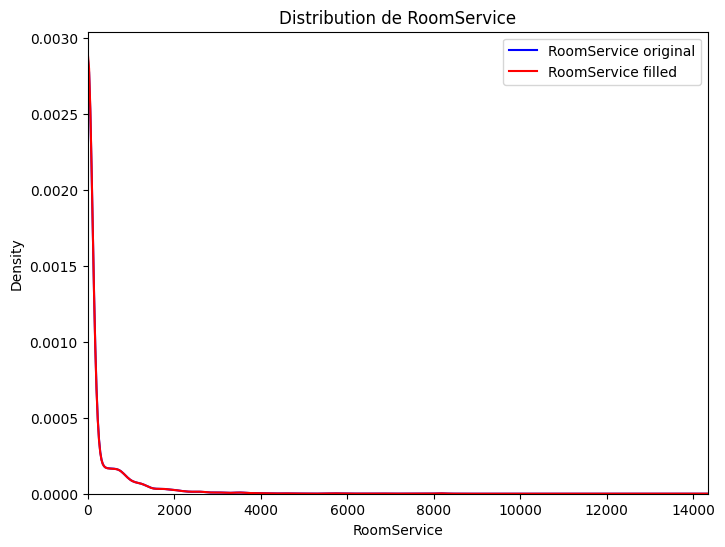

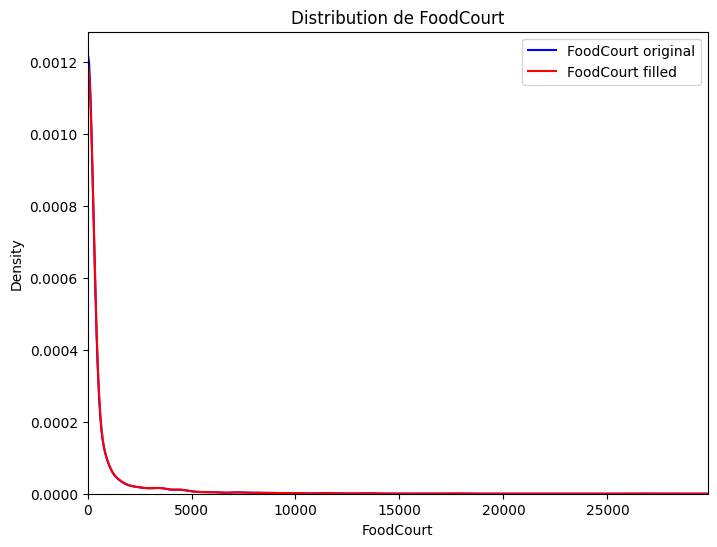

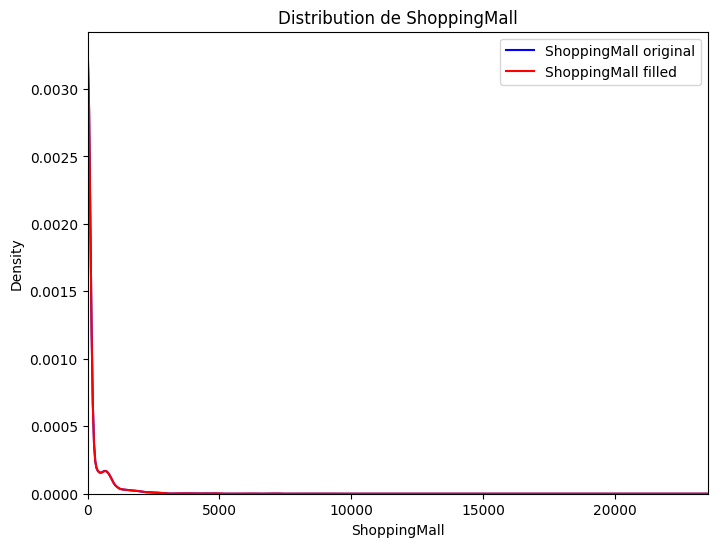

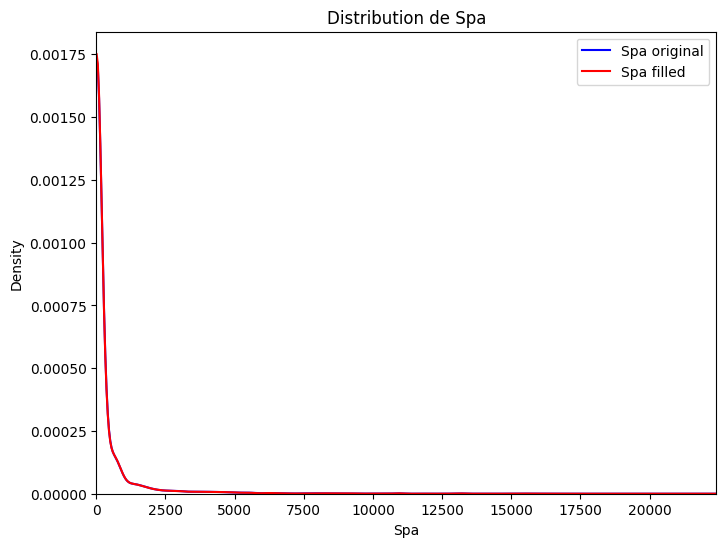

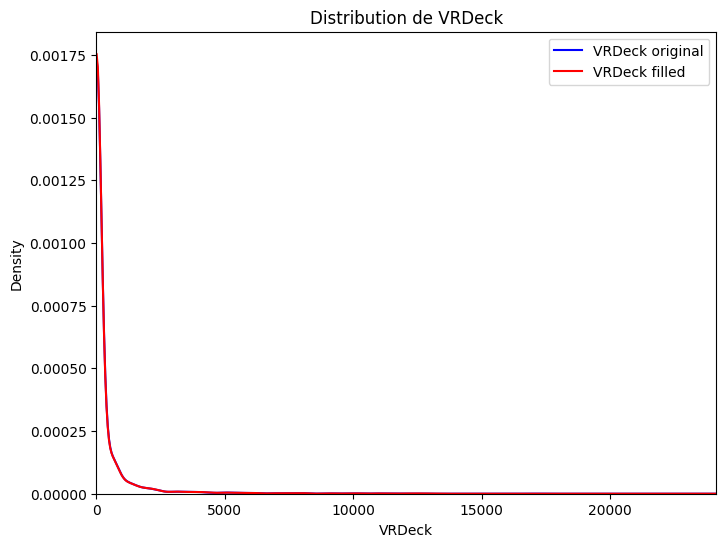

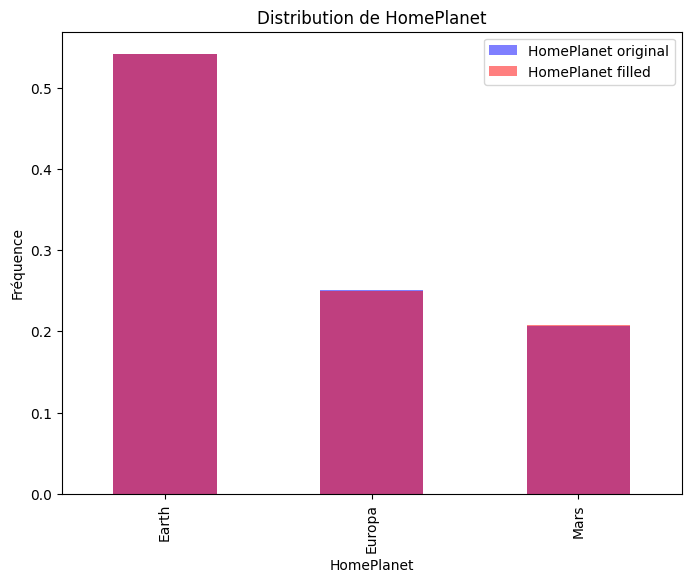

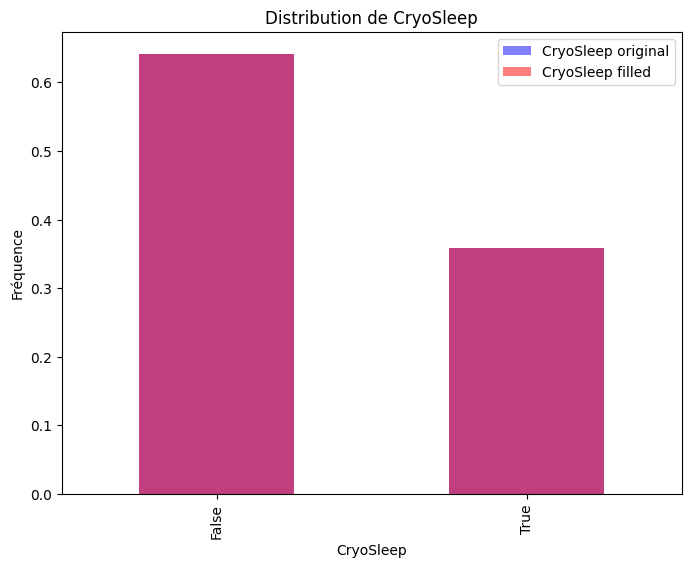

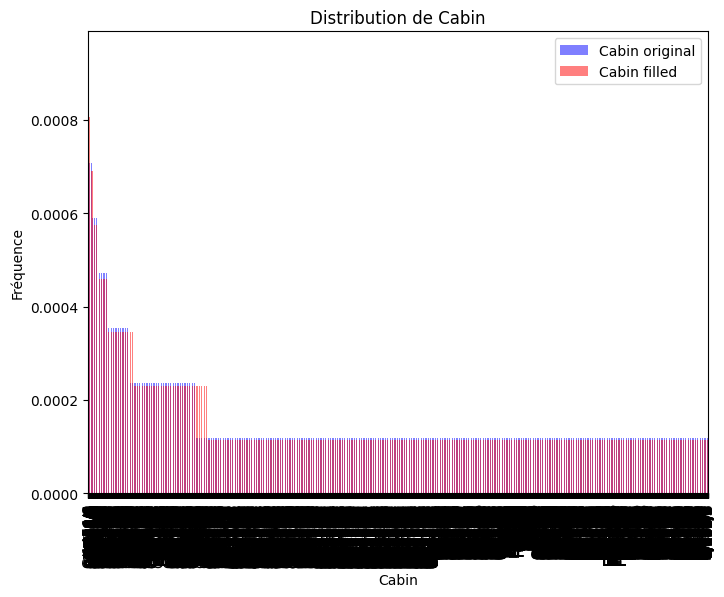

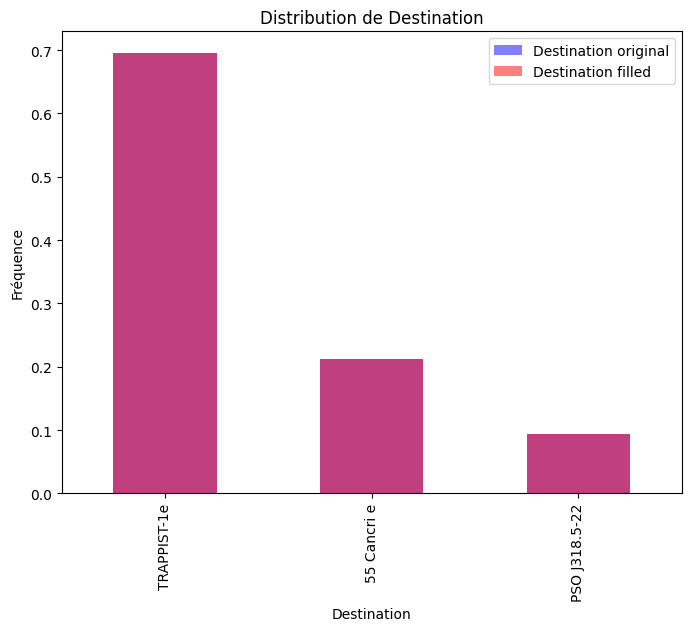

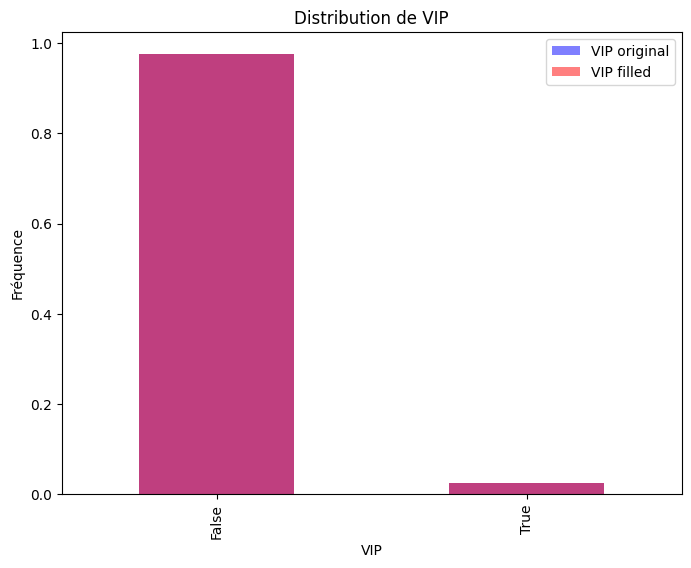

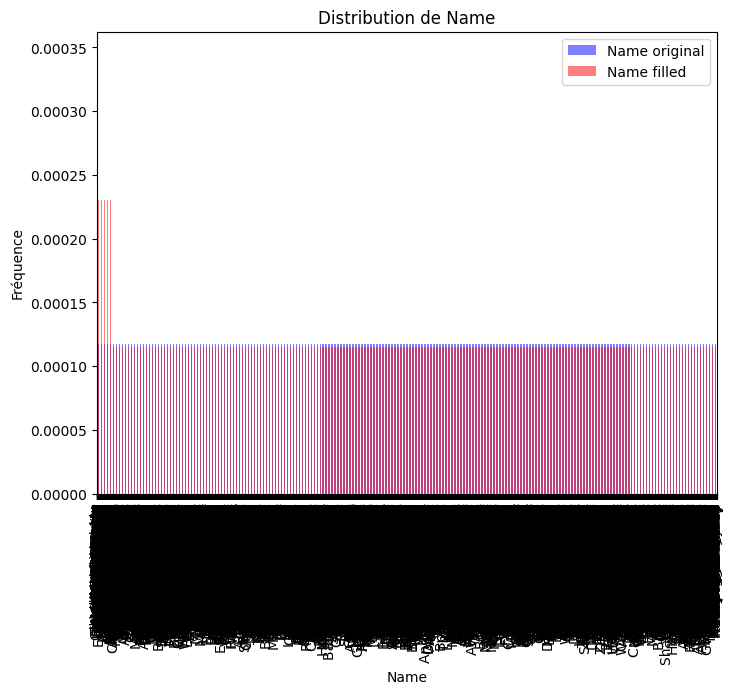

In [8]:
compare_distributions(resultat_random)

### Deuxième methode pour gérer les valeurs manquantes 
#### Processus : Remplacer les valeurs manquantes par le mode pour les variables et visualiser la distribution de la variable ensuite.

In [6]:
def missing_values_mode(dataset):
    new_dataset = dataset.copy()
      
    for var in new_dataset.columns:
        if new_dataset[var].isnull().sum() > 0:
            mode_value = new_dataset[var].mode()[0]  
            new_var_name = var + '_filled'  
            new_dataset[new_var_name] = new_dataset[var].fillna(mode_value)  
            
    return new_dataset
    

In [7]:
resultat_values_mode = missing_values_mode(spaceship_titanic_train)
resultat_values_mode.isnull().sum().sort_values(ascending= True)

Transported              0
ShoppingMall_filled      0
FoodCourt_filled         0
RoomService_filled       0
VIP_filled               0
Age_filled               0
Destination_filled       0
Cabin_filled             0
CryoSleep_filled         0
HomePlanet_filled        0
Spa_filled               0
VRDeck_filled            0
Age                    179
RoomService            181
Destination            182
Spa                    183
FoodCourt              183
VRDeck                 188
Cabin                  199
HomePlanet             201
VIP                    203
ShoppingMall           208
CryoSleep              217
dtype: int64

In [11]:
def compare_distributions_mode(dataset):
    # Sélectionner les colonnes numériques et catégorielles
    numeric_columns = dataset.select_dtypes(include=['number']).columns
    categorical_columns = dataset.select_dtypes(include=['object']).columns
    
    # Comparaison des distributions pour les colonnes numériques
    for var in numeric_columns:
        var_filled = var + '_filled'
        if var_filled in dataset.columns:
            plt.figure(figsize=(8, 6))
            dataset[var].plot(kind='kde', label=f"{var} original", color='blue')
            dataset[var_filled].plot(kind='kde', label=f"{var} filled", color='red')
            plt.title(f"Distribution de {var}")
            plt.legend()
            plt.xlabel(var)
            plt.ylabel('Density')
            plt.xlim(dataset[var].min(), dataset[var].max())
            plt.ylim(0, None)
            plt.show()
    
    # Comparaison des distributions pour les colonnes catégorielles
    for var in categorical_columns:
        var_filled = var + '_filled'
        if var_filled in dataset.columns:
            plt.figure(figsize=(8, 6))
            dataset[var].value_counts(normalize=True).plot(kind='bar', alpha=0.5, label=f"{var} original", color='blue')
            dataset[var_filled].value_counts(normalize=True).plot(kind='bar', alpha=0.5, label=f"{var} filled", color='red')
            plt.title(f"Distribution de {var}")
            plt.legend()
            plt.xlabel(var)
            plt.ylabel('Fréquence')
            plt.show()




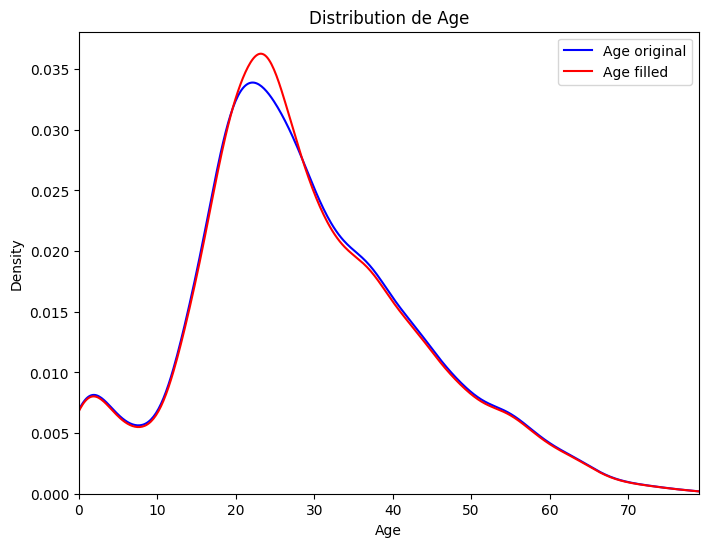

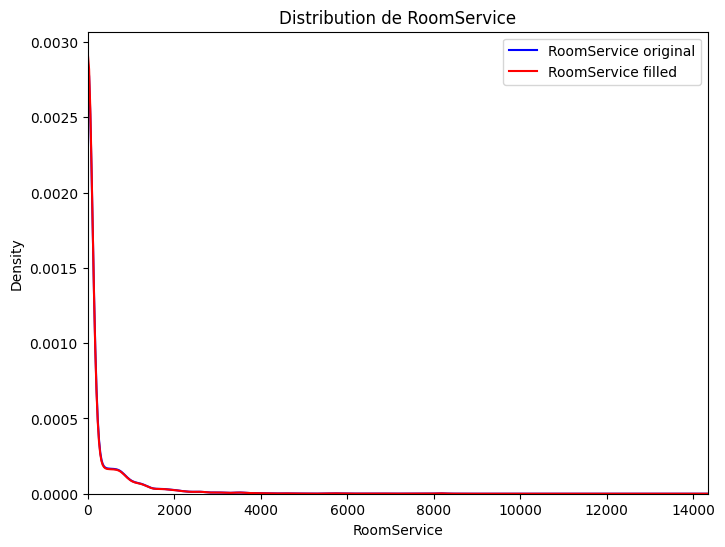

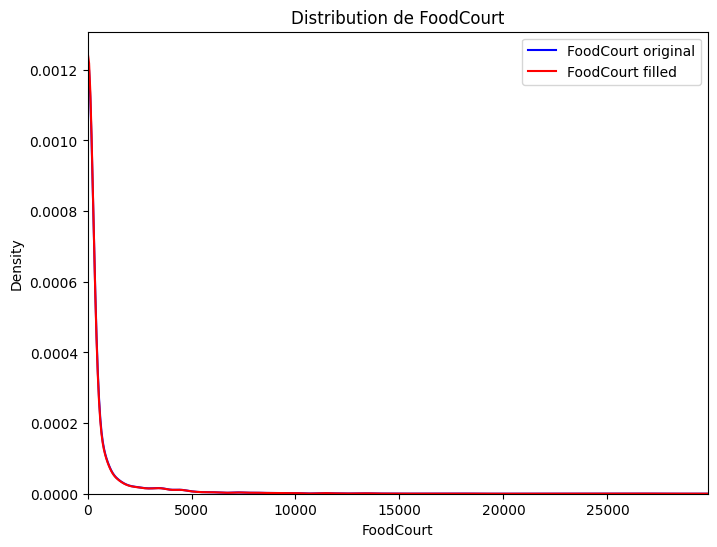

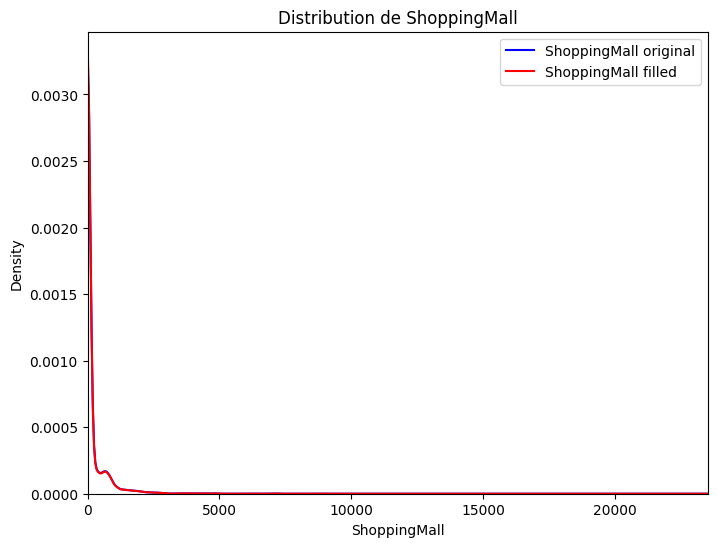

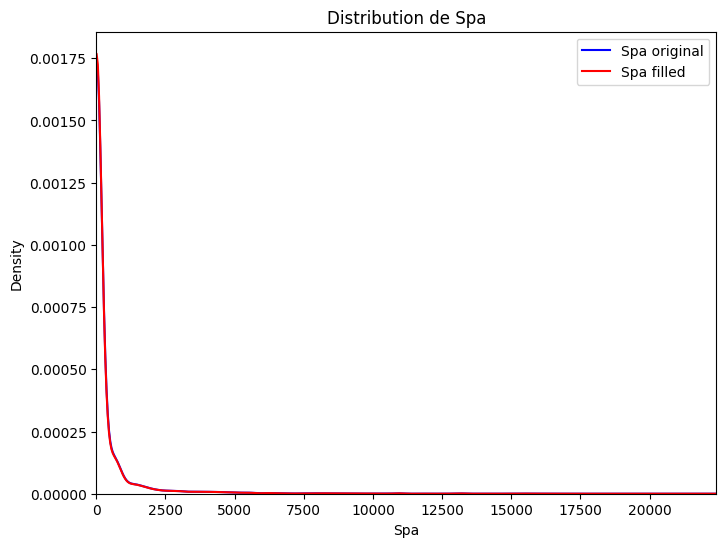

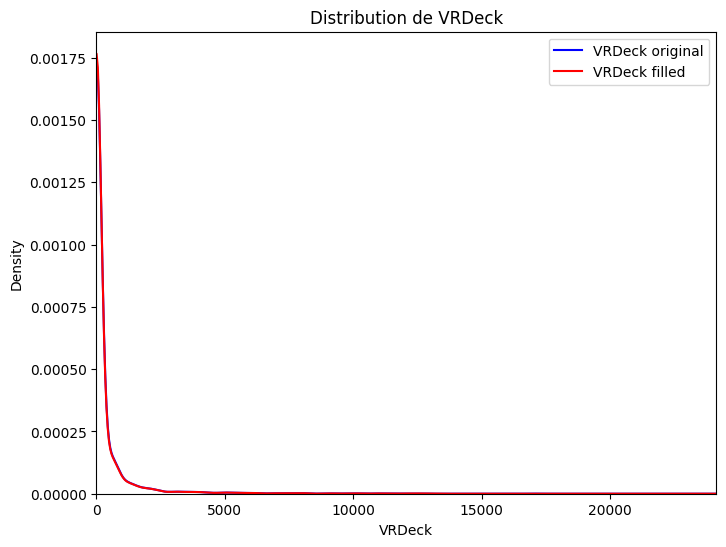

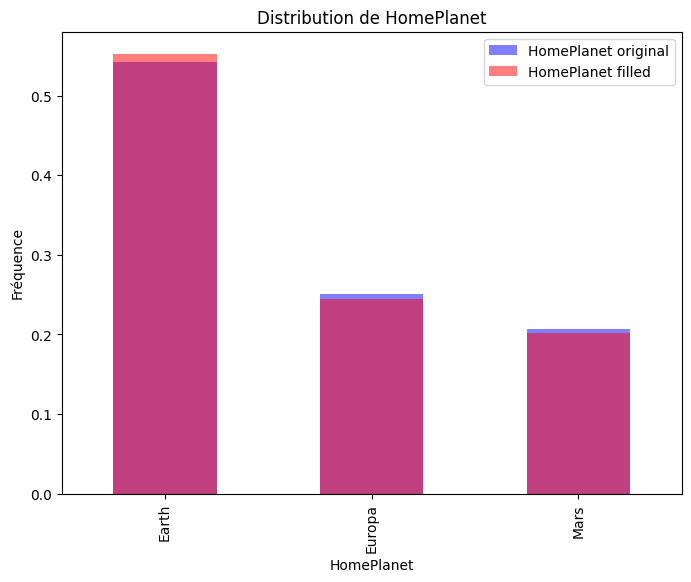

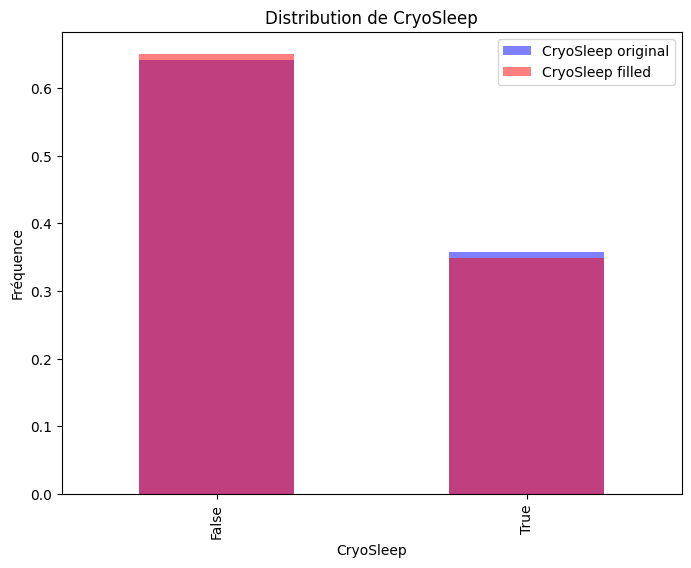

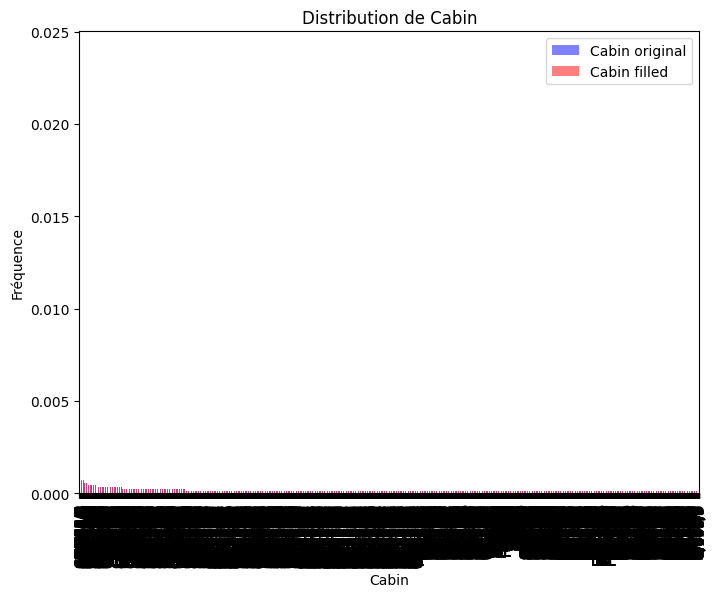

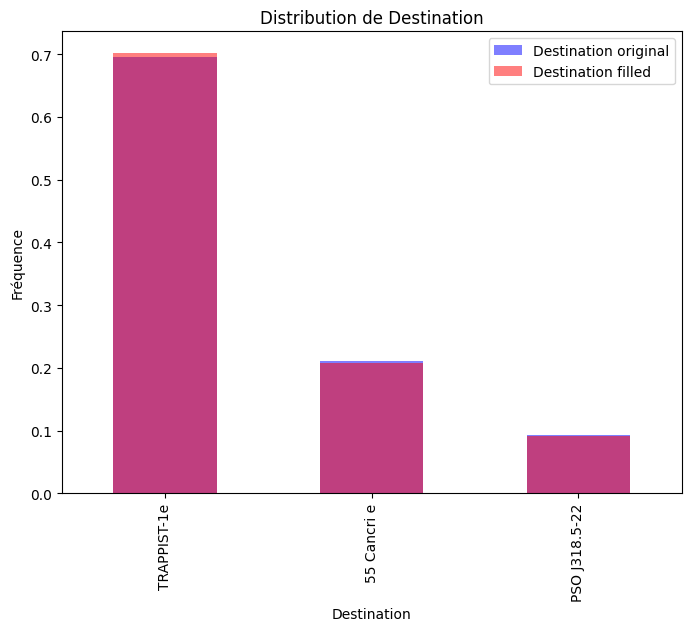

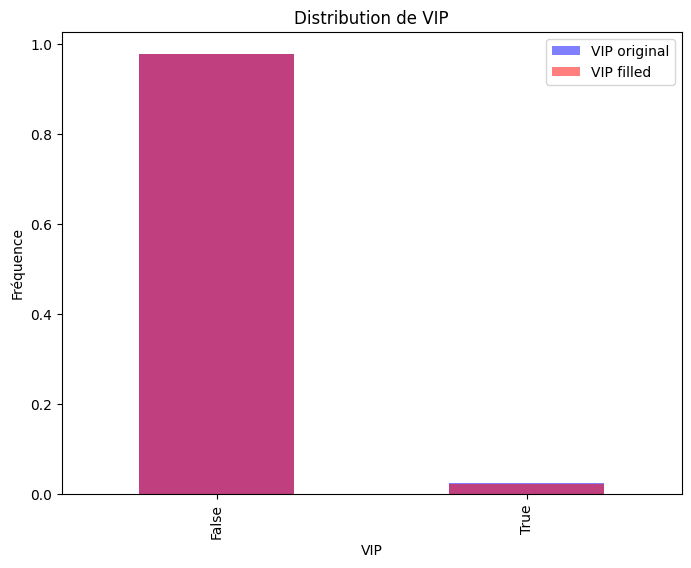

In [12]:
compare_distributions_mode(resultat_values_mode)

In [13]:
# distribution_categorical_values_mode(resultat_values_mode)

Conclusion de cette étape: Vu que la distribution des variables avec le remplacement des valeurs manquantes par le mode ne semble pas changer on peut alors on peut conclure que c'est une bonne methode et qu'on peut utiliser les variables de ce dataset pour effectuer nos analyses

In [14]:
spaceship_titanic_dataset.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [8]:
###Suppression des colonnes non importantes pour nos données d'entraînement sur le dataset calculer avec le mode
resultat_values_mode = resultat_values_mode.drop(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck' ], axis=1)
resultat_values_mode.head()

,Transported,HomePlanet_filled,CryoSleep_filled,Cabin_filled,Destination_filled,Age_filled,VIP_filled,RoomService_filled,FoodCourt_filled,ShoppingMall_filled,Spa_filled,VRDeck_filled
0,False,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0
1,True,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0
2,False,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0
3,False,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0
4,True,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0


In [9]:
###Suppression des colonnes non importantes pour nos données d'entraînement sur le dataset calculer avec le valeurs aleatoires
resultat_random = resultat_random.drop(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name_filled', 'Name'  ], axis=1)
resultat_random.head()

,PassengerId,Transported,CryoSleep_filled,ShoppingMall_filled,VIP_filled,HomePlanet_filled,Cabin_filled,VRDeck_filled,FoodCourt_filled,Spa_filled,Destination_filled,RoomService_filled,Age_filled
0,0001_01,False,False,0.0,False,Europa,B/0/P,0.0,0.0,0.0,TRAPPIST-1e,0.0,39.0
1,0002_01,True,False,25.0,False,Earth,F/0/S,44.0,9.0,549.0,TRAPPIST-1e,109.0,24.0
2,0003_01,False,False,0.0,True,Europa,A/0/S,49.0,3576.0,6715.0,TRAPPIST-1e,43.0,58.0
3,0003_02,False,False,371.0,False,Europa,A/0/S,193.0,1283.0,3329.0,TRAPPIST-1e,0.0,33.0
4,0004_01,True,False,151.0,False,Earth,F/1/S,2.0,70.0,565.0,TRAPPIST-1e,303.0,16.0


## Gestion des valeurs aberantes 

In [17]:
def plot_boxplot_all(dataset):
    plt.figure(figsize=(12, 8))
    dataset.boxplot(vert=False)
    plt.title("Boxplots des variables quantitatives")
    plt.xlabel("Valeurs")
    plt.ylabel("Variables")
    plt.show()

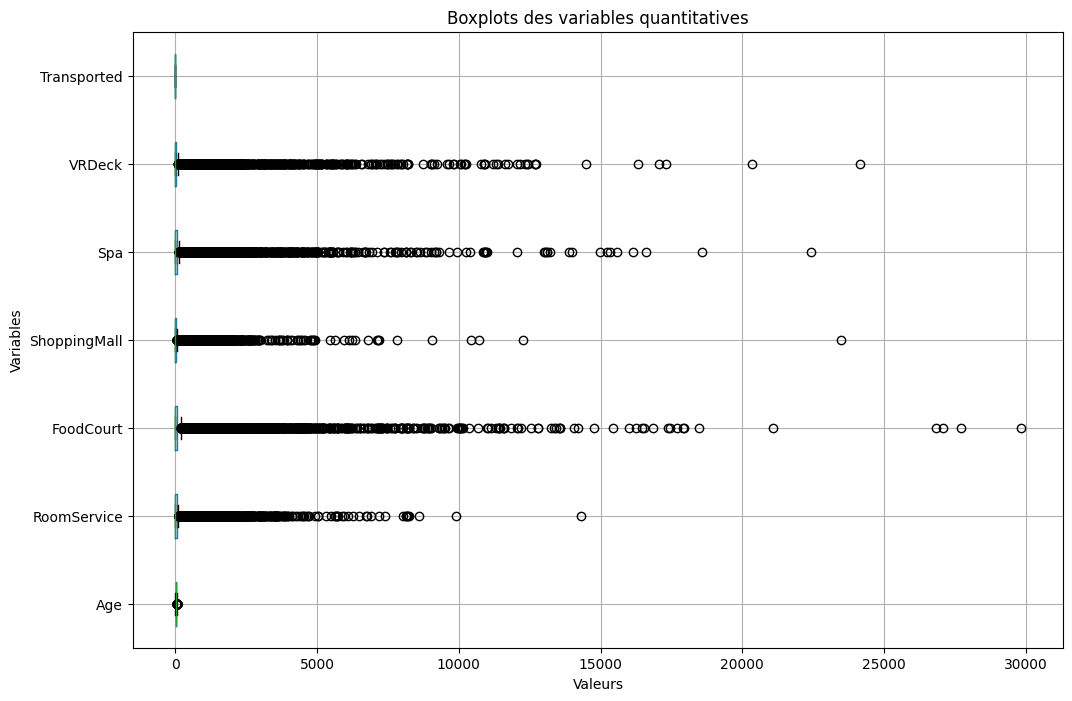

In [18]:
plot_boxplot_all(spaceship_titanic_train)

## Conclusion : 
A travers les analyses on a eu un appecu des donnees et prenons le dataset dans lequel les valeurs manquantes ont ete remplacer par les valeurs pris aleatoirement dans le jeu de donnees 

### Entrainement du dataset selectionné avec plusieurs models

In [10]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import pandas as pd

In [12]:

# Convertir les colonnes catégorielles en numériques
def preprocess_data(df):
    label_encoders = {}
    for column in df.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le
    return df, label_encoders


In [13]:
from sklearn.preprocessing import StandardScaler

def train_model_on_dataset(model, target_column='Transported'):
    global resultat_random
    resultat_random, _ = preprocess_data(resultat_random)

    X = resultat_random.drop(columns=[target_column])
    y = resultat_random[target_column]

    # Standardiser les variables
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculer et afficher la précision
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {model.__class__.__name__}: {accuracy:.4f}")


In [14]:
#Definition des models afin de les utiliser 
models = [
    RandomForestClassifier(random_state=42),
    LogisticRegression(random_state=42),
    SVC(random_state=42),
    KNeighborsClassifier(),
    DecisionTreeClassifier(random_state=42)
]

In [27]:
#boucle pour tester et donner le resultat de tous les models definis dans la variable models
for model in models:
    train_model_on_dataset(model)


Accuracy for RandomForestClassifier: 0.7786
Accuracy for LogisticRegression: 0.7631
Accuracy for SVC: 0.7844
Accuracy for KNeighborsClassifier: 0.7602
Accuracy for DecisionTreeClassifier: 0.7136


In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

# # Définir les modèles et leurs grilles de recherche d'hyperparamètres
# models = [
#     (RandomForestClassifier(random_state=42), {
#         'n_estimators': [50, 100, 200],
#         'max_depth': [None, 10, 20],
#         'min_samples_split': [2, 5, 10],
#         'min_samples_leaf': [1, 2, 4]
#     }),
#     (LogisticRegression(random_state=42), {
#         'C': [0.1, 1, 10],
#         'penalty': ['l1', 'l2'],
#         'solver': ['liblinear']
#     }),
#     (SVC(random_state=42), {
#         'C': [0.1, 1, 10],
#         'kernel': ['linear', 'rbf', 'poly'],
#         'gamma': ['scale', 'auto']
#     }),
#     (KNeighborsClassifier(), {
#         'n_neighbors': [3, 5, 7],
#         'weights': ['uniform', 'distance'],
#         'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
#     }),
#     (DecisionTreeClassifier(random_state=42), {
#         'max_depth': [None, 10, 20],
#         'min_samples_split': [2, 5, 10],
#         'min_samples_leaf': [1, 2, 4]
#     })
# ]

# def train_model_with_grid_search(model, param_grid, target_column='Transported'):
#     global resultat_random
#     resultat_random, _ = preprocess_data(resultat_random)

#     X = resultat_random.drop(columns=[target_column])
#     y = resultat_random[target_column]

#     # Standardiser les variables
#     scaler = StandardScaler()
#     X_scaled = scaler.fit_transform(X)

#     X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#     grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
#     grid_search.fit(X_train, y_train)

#     best_model = grid_search.best_estimator_
#     best_params = grid_search.best_params_

#     print(f"Best Parameters for {best_model.__class__.__name__}: {best_params}")

#     y_pred = best_model.predict(X_test)
#     accuracy = accuracy_score(y_test, y_pred)
#     print(f"Accuracy for {best_model.__class__.__name__}: {accuracy:.4f}")

# # Entraîner les modèles avec GridSearchCV
# for model, param_grid in models:
#     train_model_with_grid_search(model, param_grid)


In [32]:
from sklearn.metrics import  classification_report, confusion_matrix

def test_model_on_dataset(model, target_column='Transported'):
    global resultat_random
    resultat_random, _ = preprocess_data(resultat_random)

    # Séparation des caractéristiques (X) et de la cible (y)
    X = resultat_random.drop(columns=[target_column])
    y = resultat_random[target_column]

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Séparer les données en ensembles de test et de train
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Prédire les résultats sur l'ensemble de test
    y_pred = model.predict(X_test)

    # Calculer et afficher les métriques de performance
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {model.__class__.__name__}: {accuracy:.4f}")
    
    # Rapport de classification
    # class_report = classification_report(y_test, y_pred)
    # print("Classification Report:\n", class_report)
    
    # Matrice de confusion
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", conf_matrix)




In [33]:
for model in models:
    test_model_on_dataset(model)

Accuracy for RandomForestClassifier: 0.7786
Confusion Matrix:
 [[681 180]
 [205 673]]
Accuracy for LogisticRegression: 0.7631
Confusion Matrix:
 [[634 227]
 [185 693]]
Accuracy for SVC: 0.7844
Confusion Matrix:
 [[663 198]
 [177 701]]
Accuracy for KNeighborsClassifier: 0.7602
Confusion Matrix:
 [[649 212]
 [205 673]]
Accuracy for DecisionTreeClassifier: 0.7136
Confusion Matrix:
 [[619 242]
 [256 622]]


## Evalution des erreurs 

In [21]:
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score,validation_curve
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
import numpy as np


In [18]:
RandomForest =RandomForestClassifier(random_state=42)
AdaBoost = AdaBoostRegressor(random_state=0)
GradientBoost = GradientBoostingRegressor(random_state = 0)
#NaiveBayes = make_pipeline(pre_processor, GaussianNB ())
SVM = make_pipeline(StandardScaler(), SVR())
LSVC = make_pipeline(StandardScaler(), LinearSVR(random_state=0, tol=1e-05))
KNN = make_pipeline(StandardScaler(), KNeighborsRegressor())
LR = make_pipeline(StandardScaler(), LinearRegression())
SGD = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3))

In [19]:
models_dict = {'RandomForest': RandomForest,
                  'AdaBoost' : AdaBoost,
                  'SVM': SVM,
                  'KNN': KNN,
                  'GBT': GradientBoost, 
                  'LM': LR,
                  'SGDR': SGD,
                  'LSVC':LSVC            
                 }

In [25]:
resultat_random, _ = preprocess_data(resultat_random)

    # Séparation des caractéristiques (X) et de la cible (y)
X = resultat_random.drop(columns=['Transported'])
y = resultat_random['Transported']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
y_pred = model.predict(X_test)

In [26]:
def model_summary(model, cvn=5):
    
    model.fit(X_train,y_train)
    
    print(cross_val_score(model, X_train, y_train, cv=10).mean())
                                               
    y_pred = model.predict(X_test)
    coef_det = r2_score(y_test,y_pred) 
    print(f'Le coefficient de détermination est: {coef_det}')
    MAE = mean_absolute_error(y_test,y_pred)
    print(f'erreur absolue moyenne est: {MAE}')
    MSE = mean_squared_error(y_test,y_pred)
    print(f'erreur quadratique moyenne est: {MSE}')
    print(f'La MSE est: {np.sqrt(MSE)}')
    print(f'Ecart-type des erreurs est: {np.std(abs(y_test-y_pred))}')
    print('----------------------------------------')
    sns.displot(y_test-y_pred)
    
    #plt.scatter(y_test,y_pred)

In [35]:
y_test = np.array(y_test)

In [36]:
for name, model in models_dict.items():
    print(name)
    model_summary(model)
    plt.title(name)

RandomForest
0.7888960555693376


TypeError: numpy boolean subtract, the `-` operator, is not supported, use the bitwise_xor, the `^` operator, or the logical_xor function instead.